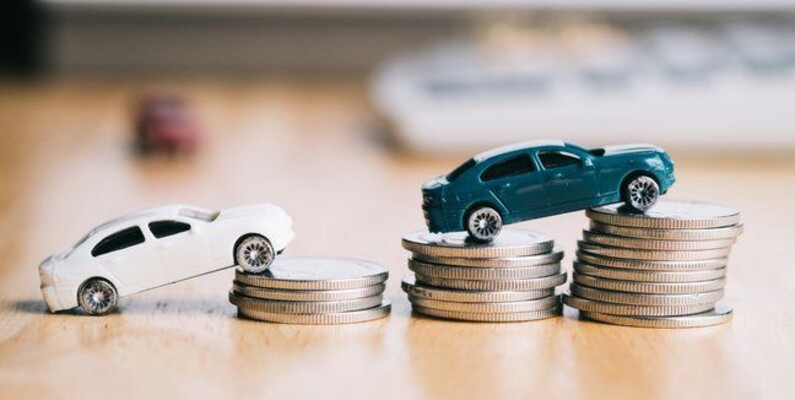

## CAR PRICE PREDICTION USING ANN

# Importing Necessary Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.metrics import r2_score


In [75]:
tf.__version__

'2.13.0'

## Importing The Dataset

In [76]:
CarSales = pd.read_csv('/content/car_purchasing.csv')
CarSales.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Overview of the Data

In [77]:
def DataOverview(CarSales, msg):
  print(f'{msg}\n')
  print(f'Data has {CarSales.shape} rows and columns respectively\n')
  print(f'COLUMNS LIST: {CarSales.columns}\n')
  print(f'DATA TYPE OF EACH COLUMN:\n{CarSales.dtypes}\n')
  print(f'DESCRIPTIVE DATA OF THE NUMERIC COLUMNS:\n{CarSales.describe()}\n')
  print(f'NULL VALUES COUNT:\n{CarSales.isnull().sum()}')

DataOverview(CarSales, 'Car Sales Dataset Overview...')

Car Sales Dataset Overview...

Data has (500, 9) rows and columns respectively

COLUMNS LIST: Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

DATA TYPE OF EACH COLUMN:
customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

DESCRIPTIVE DATA OF THE NUMERIC COLUMNS:
           gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   5

# Feature Selection

In [78]:
CarSales.drop(columns=['customer name', 'customer e-mail','country','gender'], inplace=True)
CarSales.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Independent variables as 'x'

In [79]:
x = CarSales.drop('car purchase amount', axis=1)
x.head()

,age,annual Salary,credit card debt,net worth
0,41.851720,62812.09301,11609.380910,238961.2505
1,40.870623,66646.89292,9572.957136,530973.9078
2,43.152897,53798.55112,11160.355060,638467.1773
3,58.271369,79370.03798,14426.164850,548599.0524
4,57.313749,59729.15130,5358.712177,560304.0671


# Dependent variable as 'y'

In [80]:
y = CarSales['car purchase amount']
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

# Data Preprocessing

In [81]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

# Train - Test Split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [83]:
x_train.shape

(400, 4)

In [84]:
x_test.shape

(100, 4)

# Model Building

In [85]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

# Model Compiling

In [86]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                50        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Fitting

In [87]:
ann = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split= 0.2)

Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 0.2358 - mean_absolute_error: 0.4659 - val_loss: 0.2249 - val_mean_absolute_error: 0.4495
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1764 - mean_absolute_error: 0.3965 - val_loss: 0.1649 - val_mean_absolute_error: 0.3769
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 0.1268 - mean_absolute_error: 0.3277 - val_loss: 0.1147 - val_mean_absolute_error: 0.3029
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0856 - mean_absolute_error: 0.2592 - val_loss: 0.0748 - val_mean_absolute_error: 0.2325
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0546 - mean_absolute_error: 0.1969 - val_loss: 0.0472 - val_mean_absolute_error: 0.1743
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0356 - mean_absolute_error: 0.1520 - val_loss: 0.0314 - val_mean_absolute_error: 0.1419
Epoch 7/100
10/10 [

# Model Predictions

In [88]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


# Model Evaluation

In [89]:
print(f"R2 Score = {r2_score(y_test, y_pred)}")


R2 Score = 0.997321695660501


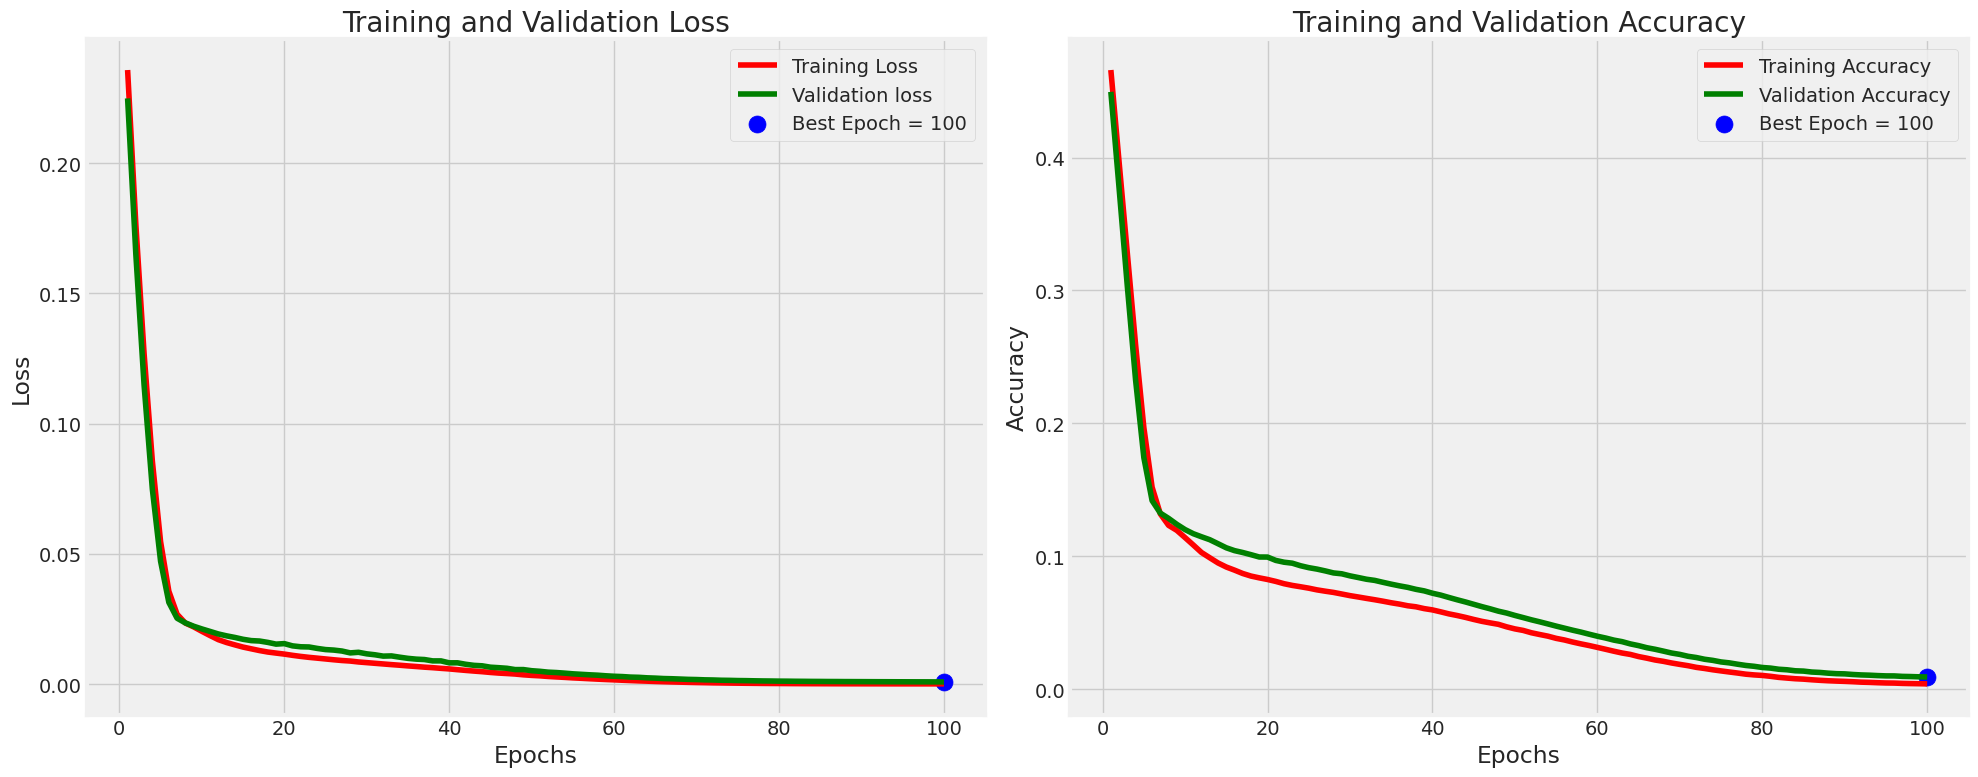

In [93]:
train_acc = ann.history['mean_absolute_error']
train_loss = ann.history['loss']
test_acc = ann.history['val_mean_absolute_error']
test_loss = ann.history['val_loss']

index_loss = np.argmin(test_loss)
val_lowest = test_loss[index_loss]

index_acc = np.argmin(test_acc)
highest_acc = test_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'Best Epoch = {str(index_loss+1)}'
acc_label = f'Best Epoch = {str(index_acc+1)}'

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, train_loss, 'r', label= 'Training Loss')
plt.plot(Epochs, test_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, train_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, test_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , highest_acc, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Happy Exploration...